# Economic Data Analysis

Kittikun Jitpairod

## Setting Up the Analysis Environment

Before we dive into our economic analysis, we need to set up our
analytical environment. This involves importing the necessary Python
libraries that will serve as our tools for data manipulation and
visualization.

We’ll be using:

-   `Pandas`: A powerful library for data manipulation and analysis
-   `Matplotlib`: A comprehensive library for creating static, animated,
    and interactive visualizations

These libraries will allow us to efficiently handle large datasets,
perform complex calculations, and create insightful visualizations of
economic trends and relationships.

Let’s start by importing these libraries and loading our economic
dataset:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the economic data from our CSV file
df = pd.read_csv('data.csv')

# Display the first few rows of the dataset to get an initial overview
display(df.head())

# Show the overall shape of our dataset
print("Dataset shape:", df.shape)

5 rows × 68 columns

Dataset shape: (80, 68)

By executing this code, we’ll get our first look at the economic data
we’ll be working with. The `head()` function will show us the first few
rows of the dataset, giving us an idea of its structure and the types of
economic indicators it contains. The `shape` attribute will tell us how
many rows and columns are in our dataset, indicating the breadth of our
economic data.

See columns label.

In [2]:
print(df.columns)

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '1960 [YR1960]', '1961 [YR1961]', '1962 [YR1962]', '1963 [YR1963]',
       '1964 [YR1964]', '1965 [YR1965]', '1966 [YR1966]', '1967 [YR1967]',
       '1968 [YR1968]', '1969 [YR1969]', '1970 [YR1970]', '1971 [YR1971]',
       '1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]',
       '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]',
       '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]',
       '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]',
       '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]',
       '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]',
       '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [

Get unique values in column.

In [3]:
print(df['Country Name'].unique())

['Thailand' 'Russian Federation' 'China' 'India' 'Saudi Arabia'
 'Indonesia' 'Myanmar' 'Japan' 'Viet Nam' 'Malaysia' 'Philippines'
 'Lao PDR' 'Cambodia' 'Korea, Rep.' 'Hong Kong SAR, China' 'Singapore']

In [4]:
old_series_names = df['Series Name'].unique()
print(old_series_names)

['GDP (current US$)' 'Population, total'
 'Unemployment, total (% of total labor force) (modeled ILO estimate)'
 'Inflation, consumer prices (annual %)'
 'Consumer price index (2010 = 100)']

## Restructuring the Data for Time Series Analysis

Now that we’ve loaded our data, we need to restructure it into a format
that’s more suitable for time series analysis. Our current dataset
likely has years as separate columns, which isn’t ideal for analyzing
trends over time or comparing different economic indicators. We’ll also
take this opportunity to simplify our data by renaming some columns and
dropping unnecessary information.

Here’s what we’re going to do:

-   Create a `dictionary` to store these renamed mappings for future use
-   Rename the economic indicators in the `Series Name` column for
    easier reference
-   Drop the `Country Code` and `Series Code` column as we won’t be
    using it in our analysis
-   Convert our `wide-format` data (where each year is a separate
    column) into a `long format`
-   Create a single `Year` column and a corresponding `Value` column

Let’s start by creating a dictionary for our renamed series:

In [5]:
new_series_names = ['GDP', 'Population', 'Unemployment', 'Inflation', 'CPI']

series_names = dict(zip(old_series_names, new_series_names))

# Display our mapping dictionary
print("Series name mappings:")
for old_name, new_name in series_names.items():
    print(f"{old_name} -> {new_name}")

# Rename the series using our mapping dictionary
df['Series Name'] = df['Series Name'].replace(series_names)

Series name mappings:
GDP (current US$) -> GDP
Population, total -> Population
Unemployment, total (% of total labor force) (modeled ILO estimate) -> Unemployment
Inflation, consumer prices (annual %) -> Inflation
Consumer price index (2010 = 100) -> CPI

Drop the `Country Code` and `Series Code` column

In [6]:
df = df.drop(columns = ['Country Code', 'Series Code'])
display(df)

80 rows × 66 columns

Now, let’s restructure our data:

In [7]:
# Melt the dataframe to convert years from columns to rows
df_melted = df.melt(id_vars=['Country Name', 'Series Name'], var_name='Year', value_name='Value')
print(df_melted.head())

  Country Name   Series Name           Year         Value
0     Thailand           GDP  1960 [YR1960]    2760750861
1     Thailand    Population  1960 [YR1960]      26596584
2     Thailand  Unemployment  1960 [YR1960]            ..
3     Thailand     Inflation  1960 [YR1960]  -0.765864333
4     Thailand           CPI  1960 [YR1960]   10.21121022

Check data type of each columns.

In [8]:
print(df_melted.dtypes)

Country Name    object
Series Name     object
Year            object
Value           object
dtype: object

Clean up the DataFrame.

In [9]:
# Clean up the 'Year' column by removing any non-year text and convert to integer
df_melted['Year'] = df_melted['Year'].str[:4].astype(int)

# Convert 'Value' to numeric, handling any non-numeric values
df_melted['Value'] = pd.to_numeric(df_melted['Value'], errors='coerce')
print(df_melted.head())

  Country Name   Series Name  Year         Value
0     Thailand           GDP  1960  2.760751e+09
1     Thailand    Population  1960  2.659658e+07
2     Thailand  Unemployment  1960           NaN
3     Thailand     Inflation  1960 -7.658643e-01
4     Thailand           CPI  1960  1.021121e+01

In [10]:
print(df_melted.dtypes)

Country Name     object
Series Name      object
Year              int64
Value           float64
dtype: object

This transformation gives us a more flexible and streamlined dataset.
Each row now represents a specific economic indicator for a particular
country in a given year, with the indicator names simplified for easier
reference.

The benefits of this restructured data include:

-   Easier filtering and grouping by year, country, or economic
    indicator
-   Simplified column names for more intuitive data manipulation
-   A consistent format for time series analysis across different
    economic indicators
-   Removed unnecessary data to focus on the most relevant information

This format will make it much easier to perform time series analysis,
compare different countries, or analyze trends across various economic
indicators in our subsequent analyses.

## Exploratory Data Analysis

Now that we have our data in a suitable format, let’s explore it to get
a better understanding of our economic indicators across different
countries and years.

In [11]:
# Get basic statistics for GDP indicator of Thailand

country = 'Thailand'
indicator = 'GDP'

print(df_melted[(df_melted['Country Name'] == country) &
    (df_melted['Series Name'] == indicator)]['Value'].describe())

count    6.400000e+01
mean     1.592162e+11
std      1.722203e+11
min      2.760751e+09
25%      1.645960e+10
50%      1.048439e+11
75%      2.676350e+11
max      5.439770e+11
Name: Value, dtype: float64

We may loop through all avaliable indicators to get basic statistics for
each economic indicator.

In [12]:
for indicator in df_melted['Series Name'].unique():

    print('\n')
    print(indicator)

    print(df_melted[(df_melted['Country Name'] == country) &
        (df_melted['Series Name'] == indicator)]['Value'].describe())



GDP
count    6.400000e+01
mean     1.592162e+11
std      1.722203e+11
min      2.760751e+09
25%      1.645960e+10
50%      1.048439e+11
75%      2.676350e+11
max      5.439770e+11
Name: Value, dtype: float64


Population
count    6.400000e+01
mean     5.376486e+07
std      1.447177e+07
min      2.659658e+07
25%      4.163871e+07
50%      5.651944e+07
75%      6.695213e+07
max      7.180128e+07
Name: Value, dtype: float64


Unemployment
count    33.000000
mean      1.301909
std       0.743189
min       0.249000
25%       0.766000
50%       1.180000
75%       1.490000
max       3.404000
Name: Value, dtype: float64


Inflation
count    63.000000
mean      4.096830
std       4.560833
min      -0.900425
25%       1.229211
50%       3.312192
75%       5.411977
max      24.313560
Name: Value, dtype: float64


CPI
count     64.000000
mean      58.696073
std       37.776153
min       10.211210
25%       20.990245
50%       53.688850
75%       93.675617
max      122.079672
Name: Value, dtype: 

Check for missing values

In [13]:
print("Missing values in each column:")
print(df_melted.isnull().sum())

Missing values in each column:
Country Name      0
Series Name       0
Year              0
Value           974
dtype: int64

Get the range of years in our dataset

In [14]:
print(f"Year range: {df_melted['Year'].min()} to {df_melted['Year'].max()}")

Year range: 1960 to 2023

We may need to drop those missing value in `Value` column.

In [15]:
print("Melted dataset shape (before drop NaN):", df_melted.shape)

df_melted.dropna(inplace = True)

print("\nAfter drop NaN")
print("Missing values in each column:")
print(df_melted.isnull().sum())
print("Melted dataset shape:", df_melted.shape)

Melted dataset shape (before drop NaN): (5120, 4)

After drop NaN
Missing values in each column:
Country Name    0
Series Name     0
Year            0
Value           0
dtype: int64
Melted dataset shape: (4146, 4)

## Analyzing Economic Growth

Let’s analyze the GDP growth rate for a specific country over time.

Equation:
$\text{GDP Growth Rate} = \frac{\text{GDP}_t - \text{GDP}_{t-1}}{\text{GDP}_{t-1}} \times 100\%$

[`.pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html):
Computes the fractional change from the immediately previous row by
default. This is useful in comparing the fraction of change in a time
series of elements.

In [16]:
df_melted = df_melted.dropna(axis='index')  # Drop rows with NaN

def calculate_gdp_growth(country):

    gdp_data = df_melted[(df_melted['Series Name'] == 'GDP') &     # filter data by country
                         (df_melted['Country Name'] == country)]

    gdp_data = gdp_data.sort_values('Year')                        # sort data

    gdp_data['GDP_Growth'] = gdp_data['Value'].pct_change() * 100  # calculate

    return gdp_data

country = 'China'
gdp_growth_data = calculate_gdp_growth(country)
print(gdp_growth_data.head())

    Country Name Series Name  Year         Value  GDP_Growth
10         China         GDP  1960  5.971625e+10         NaN
90         China         GDP  1961  5.005669e+10  -16.175770
170        China         GDP  1962  4.720919e+10   -5.688550
250        China         GDP  1963  5.070661e+10    7.408363
330        China         GDP  1964  5.970813e+10   17.752143

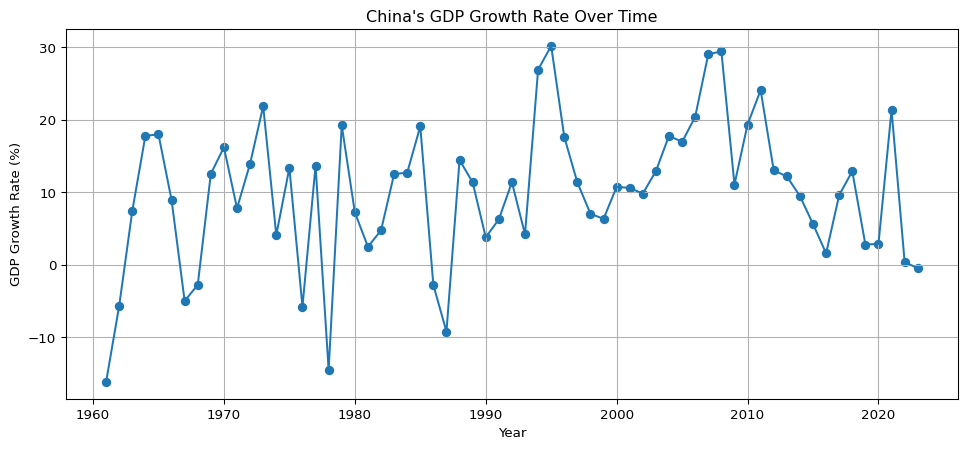

In [17]:
plt.figure(figsize=(12, 5))

plt.plot(gdp_growth_data['Year'], gdp_growth_data['GDP_Growth'])
plt.scatter(gdp_growth_data['Year'], gdp_growth_data['GDP_Growth'])

plt.title(f"{country}'s GDP Growth Rate Over Time")
plt.xlabel("Year")
plt.ylabel("GDP Growth Rate (%)")
plt.grid(True)

plt.show()

In [18]:
print(f"Average GDP Growth Rate for {country}: \
    {gdp_growth_data['GDP_Growth'].mean():.2f}%")

print(f"Highest GDP Growth Rate: {gdp_growth_data['GDP_Growth'].max():.2f}% in \
    {gdp_growth_data.loc[gdp_growth_data['GDP_Growth'].idxmax(), 'Year']}")

print(f"Lowest GDP Growth Rate: {gdp_growth_data['GDP_Growth'].min():.2f}% in \
    {gdp_growth_data.loc[gdp_growth_data['GDP_Growth'].idxmin(), 'Year']}")

Average GDP Growth Rate for China:     9.92%
Highest GDP Growth Rate: 30.15% in     1995
Lowest GDP Growth Rate: -16.18% in     1961

This analysis allows us to visualize a country’s economic growth
trajectory and identify periods of rapid growth or recession.

## Comparing Economic Development Across Countries

Next, let’s compare the GDP per capita across several countries.

In [19]:
countries = ['China', 'India', 'Japan', 'Thailand']

gdp_data = df_melted[(df_melted['Series Name'] == 'GDP') & 
                        (df_melted['Country Name'].isin(countries))]

population_data = df_melted[(df_melted['Series Name'] == 'Population') & 
                            (df_melted['Country Name'].isin(countries))]

merged_data = pd.merge(gdp_data, population_data, on=['Country Name', 'Year'])
merged_data['GDP_per_capita'] = merged_data['Value_x'] / merged_data['Value_y']

gdp_per_capita_data = merged_data.copy()

print(gdp_per_capita_data.head())

  Country Name Series Name_x  Year       Value_x Series Name_y      Value_y  \
0     Thailand           GDP  1960  2.760751e+09    Population   26596584.0   
1        China           GDP  1960  5.971625e+10    Population  667070000.0   
2        India           GDP  1960  3.702988e+10    Population  445954579.0   
3        Japan           GDP  1960  4.741924e+10    Population   93216000.0   
4     Thailand           GDP  1961  3.034038e+09    Population   27399963.0   

   GDP_per_capita  
0      103.800957  
1       89.520214  
2       83.035102  
3      508.702779  
4      110.731456  

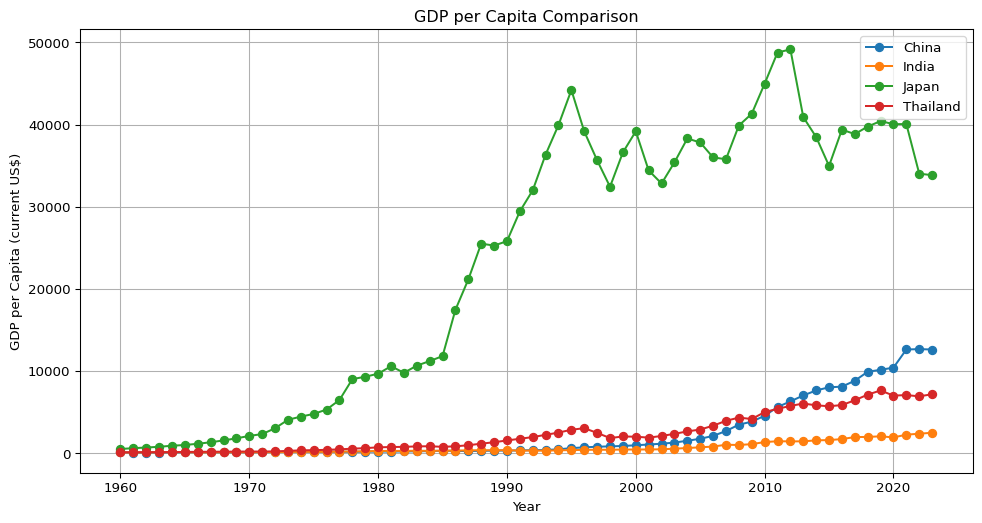

In [20]:
plt.figure(figsize=(12, 6))

for country in countries:
    country_data = gdp_per_capita_data[gdp_per_capita_data['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['GDP_per_capita'], marker='o', label=country)

plt.title("GDP per Capita Comparison")
plt.xlabel("Year")
plt.ylabel("GDP per Capita (current US$)")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Print the most recent GDP per capita for each country
latest_year = gdp_per_capita_data['Year'].max()
latest_data = gdp_per_capita_data[gdp_per_capita_data['Year'] == latest_year]

for country in countries:
    country_gdp_per_capita = \
        latest_data[latest_data['Country Name'] == country]['GDP_per_capita'].values[0]

    print(f"{country}'s GDP per capita in {latest_year}: ${country_gdp_per_capita:,.2f}")

China's GDP per capita in 2023: $12,614.07
India's GDP per capita in 2023: $2,484.85
Japan's GDP per capita in 2023: $33,834.43
Thailand's GDP per capita in 2023: $7,171.81

This comparison helps us understand the relative economic development of
different countries over time.

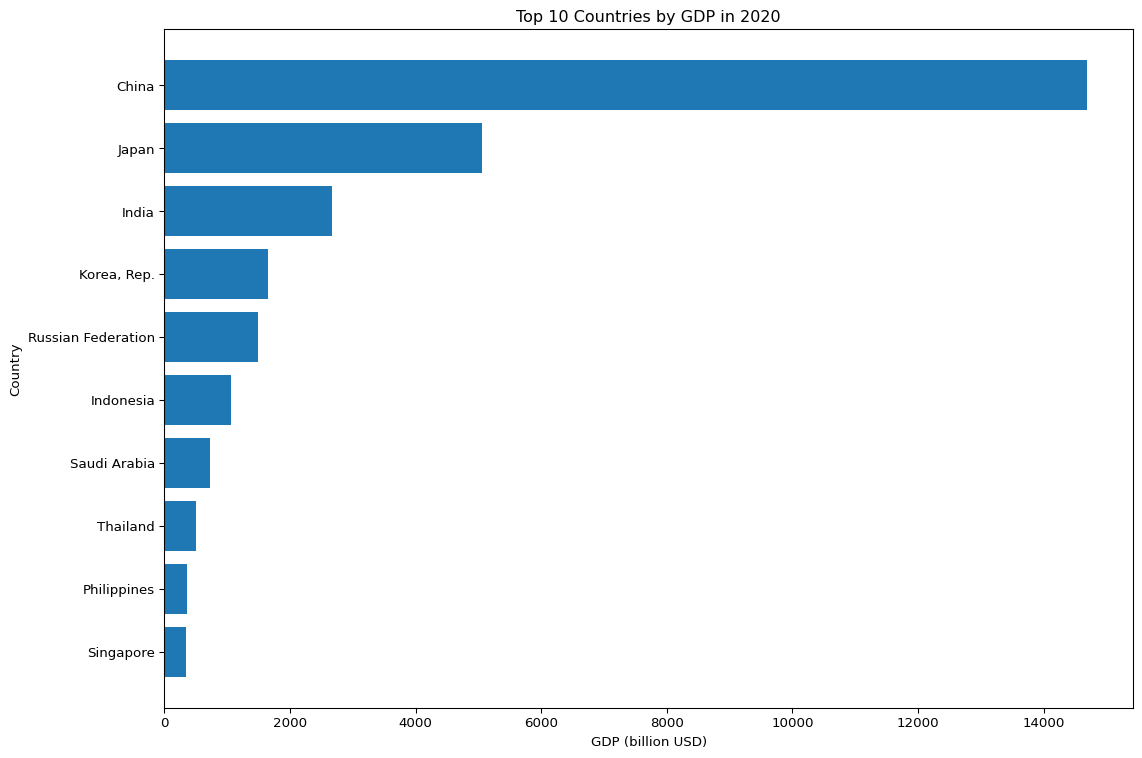

In [22]:
def compare_countries_bar(indicator, year, top_n=10):

    data = df_melted[(df_melted['Series Name'] == indicator) & (df_melted['Year'] == year)]
    data = data.sort_values('Value', ascending = True).tail(top_n)

    # Convert GDP to billions of dollars
    if indicator == 'GDP':
        data.loc[:, 'Value'] = data['Value'] / 1e9  # Convert to billions
    
    plt.figure(figsize=(12, 8))
    plt.barh(data['Country Name'], data['Value'])

    plt.title(f"Top {top_n} Countries by {indicator} in {year}")
    plt.xlabel("GDP (billion USD)" if indicator == 'GDP' else indicator)
    plt.ylabel("Country")

    plt.tight_layout()
    plt.show()

compare_countries_bar('GDP', 2020)

## Inflation Analysis

Let’s analyze inflation trends for a specific country.

In [23]:
def analyze_inflation(country):

    inflation_data = df_melted[(df_melted['Series Name'] == 'Inflation') & 
                               (df_melted['Country Name'] == country)]
    inflation_data = inflation_data.sort_values('Year')
    return inflation_data

country = 'Singapore'
inflation_data = analyze_inflation(country)

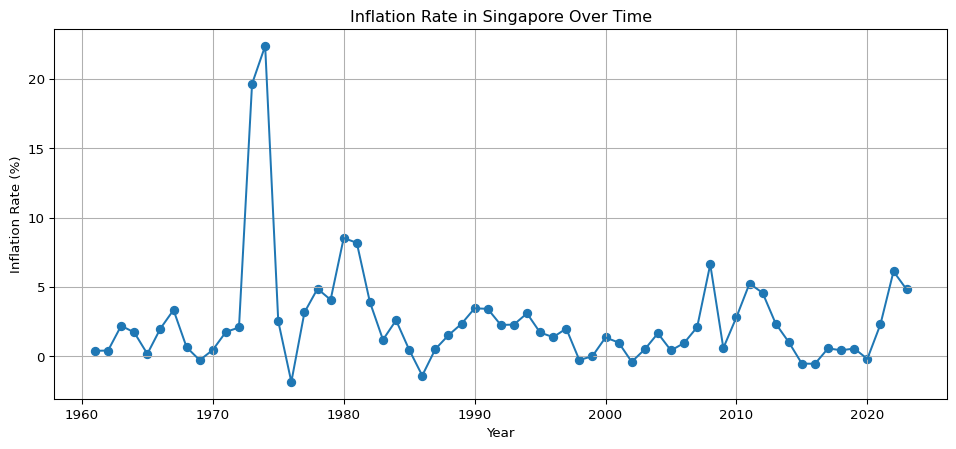

In [24]:
plt.figure(figsize=(12, 5))
plt.plot(inflation_data['Year'], inflation_data['Value'])
plt.scatter(inflation_data['Year'], inflation_data['Value'])
plt.title(f"Inflation Rate in {country} Over Time")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.grid(True)

plt.show()

In [25]:
print(f"Average Inflation Rate for {country}: {inflation_data['Value'].mean():.2f}%")

print(f"Highest Inflation Rate: {inflation_data['Value'].max():.2f}% \
    in {inflation_data.loc[inflation_data['Value'].idxmax(), 'Year']}")

print(f"Lowest Inflation Rate: {inflation_data['Value'].min():.2f}% \
    in {inflation_data.loc[inflation_data['Value'].idxmin(), 'Year']}")

Average Inflation Rate for Singapore: 2.56%
Highest Inflation Rate: 22.37%     in 1974
Lowest Inflation Rate: -1.84%     in 1976

This analysis helps us understand a country’s monetary stability and
potential periods of economic stress.

## Unemployment and GDP Growth Relationship

Finally, let’s examine the relationship between unemployment and GDP
growth for a country.

In [26]:
def analyze_unemployment_gdp_relationship(country):

    gdp_data = calculate_gdp_growth(country)

    unemployment_data = df_melted[(df_melted['Series Name'] == 'Unemployment') & 
                                  (df_melted['Country Name'] == country)]
    
    merged_data = pd.merge(gdp_data[['Year', 'GDP_Growth']], unemployment_data, on='Year')
    return merged_data

country = 'Indonesia'
relationship_data = analyze_unemployment_gdp_relationship(country)
print(relationship_data.head())

   Year  GDP_Growth Country Name   Series Name  Value
0  1991    9.874601    Indonesia  Unemployment  2.617
1  1992    9.779458    Indonesia  Unemployment  2.734
2  1993   23.416935    Indonesia  Unemployment  2.782
3  1994   11.952002    Indonesia  Unemployment  4.366
4  1995   14.268593    Indonesia  Unemployment  4.611

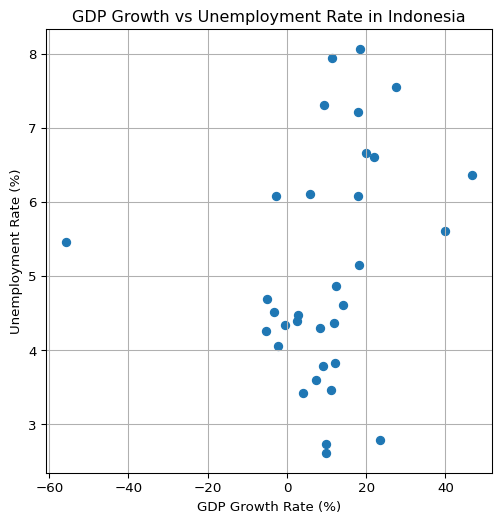

Correlation between GDP Growth and Unemployment Rate in Indonesia: 0.23

In [27]:
plt.figure(figsize=(6, 6))
plt.scatter(relationship_data['GDP_Growth'], relationship_data['Value'])

plt.title(f"GDP Growth vs Unemployment Rate in {country}")
plt.xlabel("GDP Growth Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.grid(True)

plt.show()

correlation = relationship_data['GDP_Growth'].corr(relationship_data['Value'])
print(f"Correlation between GDP Growth and Unemployment Rate in {country}: {correlation:.2f}")

This analysis helps us understand the relationship between economic
growth and labor market conditions, potentially revealing Okun’s Law in
action.

These steps provide a comprehensive analysis of various economic
indicators, allowing students to derive insights about economic growth,
development, monetary policy, and labor markets across different
countries and time periods.

## Creating an Economic Dashboard

Finally, let’s create a comprehensive economic dashboard for a country,
bringing together multiple economic indicators.

In [28]:
country = 'Thailand'
indicators = ['GDP', 'Inflation', 'Unemployment']

dashboard_data = df_melted[(df_melted['Country Name'] == country) & 
                           (df_melted['Series Name'].isin(indicators))]

print('------- Unpivot -------')
print(dashboard_data.head())
print('\n')

dashboard_pivot = dashboard_data.pivot(index='Year', columns='Series Name', values='Value')
print('------- Pivot -------')
print(dashboard_pivot.head())

------- Unpivot -------
    Country Name Series Name  Year         Value
0       Thailand         GDP  1960  2.760751e+09
3       Thailand   Inflation  1960 -7.658643e-01
80      Thailand         GDP  1961  3.034038e+09
83      Thailand   Inflation  1961  7.386990e+00
160     Thailand         GDP  1962  3.308913e+09


------- Pivot -------
Series Name           GDP  Inflation  Unemployment
Year                                              
1960         2.760751e+09  -0.765864           NaN
1961         3.034038e+09   7.386990           NaN
1962         3.308913e+09   3.696099           NaN
1963         3.540403e+09        NaN           NaN
1964         3.889130e+09  -0.792079           NaN

## Creating an Economic Dashboard

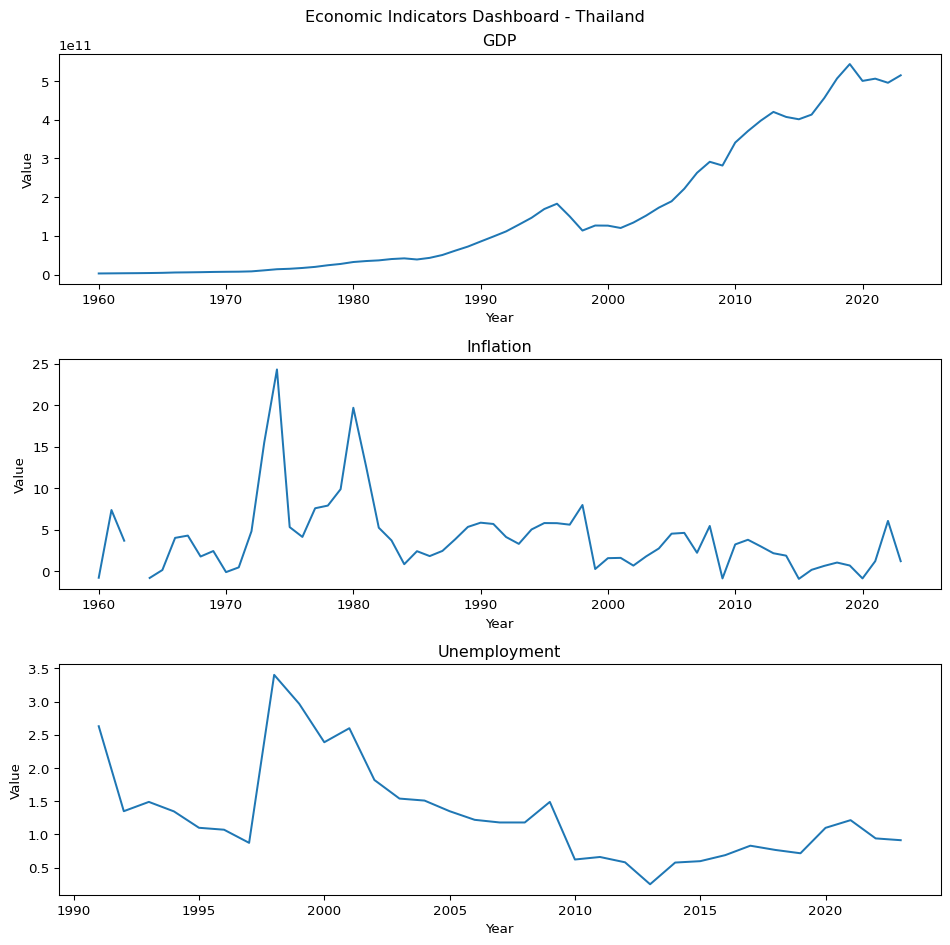

In [29]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle(f"Economic Indicators Dashboard - {country}")

for i, indicator in enumerate(indicators):
    axes[i].plot(dashboard_pivot.index, dashboard_pivot[indicator])
    axes[i].set_title(indicator)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()